In [1]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/01_dendrone_pore/py_files')


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.cm import get_cmap

from dendrons_pore import dendrons_pore
from create_in import create_in
from out_reader import out_reader
from h_scf import h_scf

In [11]:
# Функция для расчета профилей через SCF
def compute_scf_profiles(Cs_range, g_range, alpha, S, D, N, chi):
    phi_dif_cs_g_SCF = {}
    brush_thickness = {}

    for g in g_range:
        # Определяем структуру полимера
        if g == 0:
            pol_structure = f'(P0)1(P){N-2}(E)1'
        elif g == 1:
            pol_structure = f'(P0)1(P){N-2}(EL)1[(P){N-1}(E)1](P){N-1}(E)1'
        elif g == 2:
            pol_structure = f'(P0)1(P){N-2}(EL)1[(P){N-1}(E)1[(P){N-1}(E)1](P){N-1}(E)1](P){N-1}(E)1[(P){N-1}(E)1](P){N-1}(E)1'
        elif g == 3:
            pol_structure = f'(P0)1(P){N-2}(EL)1[(P){N-1}(E)1[(P){N-1}(E)1[(P){N-1}(E)1](P){N-1}(E)1](P){N-1}(E)1[(P){N-1}(E)1](P){N-1}(E)1](P){N-1}(E)1[(P){N-1}(E)1[(P){N-1}(E)1](P){N-1}(E)1](P){N-1}(E)1[(P){N-1}(E)1](P){N-1}(E)1'
        else:
            print(f"Поколение {g} не обработано")
            continue

        phi_dif_cs_SCF = {}
        brush_thickness_cs = {}

        for cs in Cs_range:
            # Генерируем SCF-инпут и парсим профили
            file_name_pro = create_in(
                template_pore='/home/tpopova/prj/PB_SCF/01_dendrone_pore/scf_templates/dendr_template.in',
                range_param='generation',
                min_val=0.1,
                max_val=0.1,
                Cs=cs,
                chi=chi,
                D=D,
                N=N,
                S=S,
                alpha=alpha,
                pol_structure=pol_structure
            )

            psi, phi_brush, phi_end_brush, phi_end_leg_brush = out_reader(file_names=file_name_pro)

            # Сохраняем профили и рассчитываем толщину щетки
            coord = np.arange(D)
            phi_dif_cs_SCF[cs] = (coord, phi_brush)

            # Расчет толщины щетки с помощью h_scf
            brush_thickness_cs[cs] = h_scf(dens_pol_profile=phi_brush)

        phi_dif_cs_g_SCF[g] = phi_dif_cs_SCF
        brush_thickness[g] = brush_thickness_cs

    return phi_dif_cs_g_SCF, brush_thickness

In [12]:
# Основные параметры
Cs_ranges = [[0.001, 0.003, 0.007]]
alpha = 0.5
S = 150
D = 170
N = 300
chi = 0.5
g_range = [0]

In [13]:
H = []
for cs_ in Cs_ranges:
    phi_dif_cs_g_SCF, brush_thickness = compute_scf_profiles(cs_, g_range, alpha, S, D, N, chi)
    H.append(brush_thickness)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.346877e+00 |g| = 6.372186e+00 alpha = 1.000000e+00 
hessian scaling: 1.46791
it =  1  E = 2.125040e+00 |g| = 5.746917e+00 alpha = 1.156932e-01 
it =  2  E = 2.676794e+00 |g| = 6.346211e+00 alpha = 7.598519e-02 
it =  3  E = 5.071854e+00 |g| = 6.012173e+00 alpha = 1.866957e-02 
it =  4  E = 1.204820e+01 |g| = 6.530211e+00 alpha = 3.824999e-03 
it =  5  E = 4.803579e+00 |g| = 6.876513e+00 alpha = 2.369485e-02 
it =  6  E = 1.364211e+01 |g| = 6.943607e+00 alpha = 3.170861e-03 
it =  7  E = 1.618405e+01 |g| = 6.940876e+00 alpha = 2.361857e-03 
it =  8  E = 2.780542e+01 |g| = 6.981695e+00 alpha = 7.656443e-04 
it =  9  E = 1.954144e+01 |g| = 6.939712e+00 alpha = 1.440294e-03 
it =  10  E = 5.496392e+01 |g| = 6.943393e+00

In [14]:
print(H)

[{0: {0.001: 159, 0.003: 160, 0.007: 161}}]


In [15]:
# def compute_h_differences(brush_thickness, Cs_range):
#     differences = {}
#     for g, thickness in brush_thickness.items():
#         H_min = thickness[min(Cs_range)]
#         H_max = thickness[max(Cs_range)]

#         # Проверяем, что H корректны
#         if H_min is None or H_max is None:
#             differences[g] = None
#             continue

#         # Считаем разницу между H
#         differences[g] = H_max - H_min
#     return differences

In [16]:
# # Основные параметры
# Cs_ranges = [[0.01, 0.005]]
# alpha = 0.5
# S = 150
# D = 170
# N = 300
# chi = 0.5
# g_range = [0, 1, 2, 3]

# # Вычисляем профили и разницы для каждого набора концентраций соли
# all_differences = []
# labels = []

# for Cs_range in Cs_ranges:
#     phi_dif_cs_g_SCF, brush_thickness = compute_scf_profiles(Cs_range, g_range, alpha, S, D, N, chi)
#     differences = compute_h_differences(brush_thickness, Cs_ranges)
#     all_differences.append(differences)
#     labels.append(f"Cs = {Cs_range}")

In [17]:
# # Построение графиков
# plt.figure(figsize=(10, 6))

# for i, differences in enumerate(all_differences):
#     gens = list(differences.keys())
#     values = list(differences.values())
#     plt.plot(gens, values, marker='o', label=labels[i])

# # Настройки графика
# plt.xlabel("Поколение (g)", fontsize=14)
# plt.ylabel(r"$H^{Cs_{max}} - H^{Cs_{min}}$", fontsize=14)
# plt.legend(fontsize=12)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

График расчета между концами профилей при разных концентрациях в зависимости от поколений: аналитическая теория

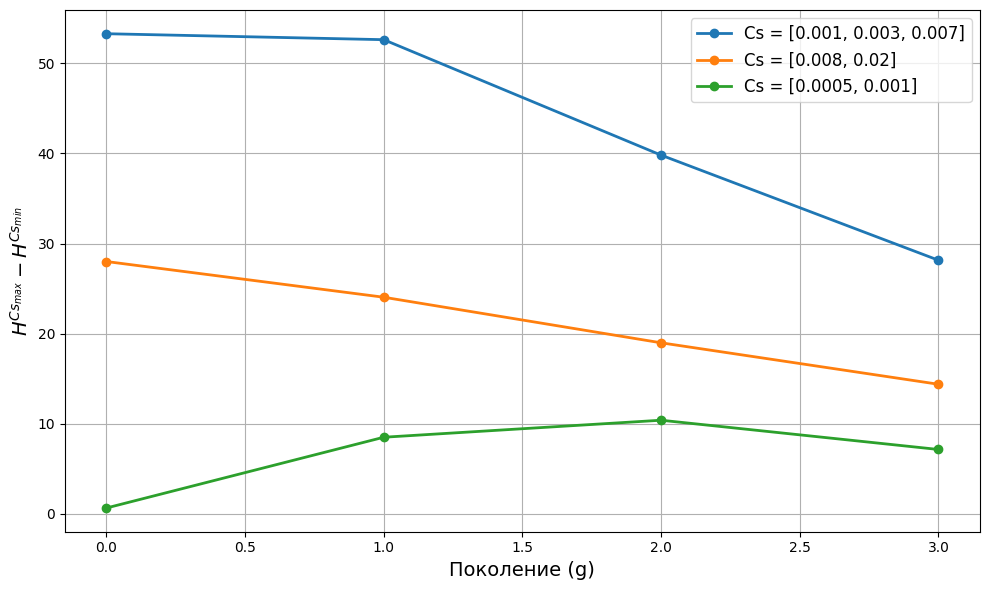

In [ ]:
# Функция для расчета профилей
def compute_profiles(Cs_range, g_range, alpha, S, D, N, q):
    phi_dif_cs_g = {}
    generation = {}

    for g in g_range:
        phi_dif_cs = {}
        for cs in Cs_range:
            # Вычисления с использованием dendrons_pore
            N, n, theta, H_dendrons, r_in_dendrons, r_out_dendrons, \
            psi_in_dendrons, psi_out_dendrons, c_pol_dendrons, rho_dendrons = dendrons_pore(
                Cs=cs, alpha=alpha, S=S, D=D, g=g, q=q, n_base=1, N_opt=N
            )
            phi_dif_cs[cs] = (r_in_dendrons, c_pol_dendrons)
        
        phi_dif_cs_g[g] = phi_dif_cs
        generation[g] = n
    
    return phi_dif_cs_g, generation

# Функция для вычисления различий между последними точками
def compute_last_point_differences(phi_dif_cs_g, Cs_range):
    last_point_differences = {}
    for g, phi_dif_cs in phi_dif_cs_g.items():
        # Последние точки для min и max концентраций соли
        r_min = phi_dif_cs[min(Cs_range)][0][-1]
        r_max = phi_dif_cs[max(Cs_range)][0][-1]
        # Разница
        last_point_differences[g] = abs(r_max - r_min)
    return last_point_differences

# Основные параметры
Cs_ranges = [[0.001, 0.003, 0.007], [0.008, 0.02], [0.0005, 0.001]]
alpha = 0.5
S = 150
D = 170
N = 300
q = 2
g_range = [0, 1, 2, 3]

# Вычисление данных для всех наборов концентраций соли
all_last_point_differences = []
labels = []

for Cs_range in Cs_ranges:
    # Вычисление профилей
    phi_dif_cs_g, generation = compute_profiles(Cs_range, g_range, alpha, S, D, N, q)
    # Вычисление различий
    last_point_differences = compute_last_point_differences(phi_dif_cs_g, Cs_range)
    all_last_point_differences.append(last_point_differences)
    labels.append(f"Cs = {Cs_range}")

# Построение графиков
plt.figure(figsize=(10, 6))

for i, last_point_differences in enumerate(all_last_point_differences):
    gens = list(last_point_differences.keys())
    distances = list(last_point_differences.values())
    plt.plot(gens, distances, marker='o', linewidth=2, label=labels[i])

# Настройки графика
plt.xlabel("Поколение (g)", fontsize=14)
plt.ylabel(r"$H^{Cs_{max}} - H^{Cs_{min}}$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig('dist_betwen_ends.pdf', dpi=300, bbox_inches='tight')
plt.show()